# Final Project

You have made it to the end of the course, and you have worked hard to develop your DSA perspectives and skills.  So far we have been internally focused on the operations of performing data science and analytics.  Now we will extend our work to the development of a data story that is externally focused.

In the Module8 labs, you saw simplified examples of constructing data stories. In module4 (Database) there also was an abbreviated example data story.  Throughout the course, there are components and parts useful to consider as a basis for developing a short, unique, focused data story.


For this final project, you will 

- Step 0: Choose your Language for this Adventure

- Step 1: Find a Story

- Step 2: Remember your Audience

- Step 3: Find and Stage Your Data

- Step 4: Vet Data Sources

- Step 5: Filter Results and Build/Validate Models

- Step 6: Visualize Results

- Step 7: Communicate the Story to your intended audience using visualizations and narratives

- Final Step: Connect your workflow/process to the DSA-Project Life Cycle

---
Here are some recommendations for managing the scope and quality of this project:

- Narrow down the issue, problem, question, or hypothesis for you data story to a single, relatively simple perspective.

- Identify already available data that affords addressing your problem.  If using completely new data, know it well.

- Address the data relative to the statistical/machine learning model(s) chosen to minimize any issues.

- Internally document your code using comments that explain the purpose of the operation(s).


Make your project unique by

- Comparing two or more different statistical/machine learning models using the same data.
- Refrain from identically replicating any existing projects obtained from external sources.
- Running a single model multiple times and changing a different single parameter each time for comparison.
- Changing the sampling proportions for building the hold-out data and comparing the same model performance repeatedly.
- Select something you find interesting or unique in the data and write a story around it.




## Step 0: Choose your Language for this Adventure:

You can do this project in either *R* or *Python*.

To change the kernel of this notebook, do the following with the `Kernel` menu.

 * `Kernel > Change Kernel > Python 3`
 * `Kernel > Change Kernel > R`

![FP_Change_Kernel.png MISSING](../images/FP_Change_Kernel.png)


---
## Step 1: Find a Story

Think back to any of the data files we have used in this class. 
Alternatively, you can search online for potential data and story ideas.

In the cell below, please detail the source of your data (with link).
Additionally, preview your story you hope to uncover.

This is the Boston Housing Dataset which was collected in 1978 and has 506 entries with 14 attributes of houses in it 
Link:https://www.kaggle.com/fedesoriano/the-boston-houseprice-data.
->Dataset Attribute info:
->CRIM     per capita crime rate by town

->ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

->INDUS    proportion of non-retail business acres per town

->CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

->NOX      nitric oxides concentration (parts per 10 million)

->RM       average number of rooms

->AGE      proportion of owner-occupied units built prior to 1940

->DIS      weighted distances to five Boston employment centres

->RAD      index of accessibility to radial highways

->TAX      full-value property-tax rate per $10,000

->PTRATIO  pupil-teacher ratio by town

->B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

->LSTAT    lower status of the population

->MEDV     Median value of owner-occupied homes in $1000's





## Step 2: Remember your Audience

In the cell below, describe your audience!
 * Who will the audience be?
 * What value will they derive from your story?

->People who wants to know the information regarding the real estate in the boston are the audience

->They will get the estimated price of the house based on the attributes


## Step 3: Find and Stage Your Data

If you data is from another source, such as Kaggle, you must download it to your local computer, then upload the data to JuptyerHub.

#### If you are uploading files:
 * Use folder navigation of your first JupyterTab to get to course's `/modules/module8/exercises/` folder.
![FP_Folder_Navigation.png MISSING](../images/FP_Folder_Navigation.png)
 * Click the Upload Button and Choose File(s)
![FP_Upload_Button.png MISSING](../images/FP_Upload_Button.png)
 * Activate the upload
![FP_UploadFile_2.png MISSING](../images/FP_UploadFile_2.png)
 

### In the cell below, please list the name(s) of the file(s) that is now accessible on the JupyterHub environment.

**Note**: 
If you uploaded a file to your `module8/exercises` folder, the file name is all you need to load it into the a data frame in the usual manner.
If you are using a file from another module of the course, you should be able to copy the full pathname and use it as is in this notebook.

The file name is:'boston.csv'



## Step 4: Vet Data Sources

Use the cells below to load the data, inspect it, conduct data carpentry and shaping; perform exploratory data analysis.  

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
import seaborn as sns


### Reading Dataset

In [3]:
hdata=pd.read_csv('boston.csv')
hdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


This gives details of the statistical analysis of the dataset like mean,standard deviation....

In [4]:
hdata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


To check the datatypes of the variables ,no of rows and columns and to check weather there are null values in it 

In [5]:
hdata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Let us just drop the rows which contains atleast one NA values if they exists

In [6]:
hdata=hdata.dropna()

So now we shall create box plots for all to check if it has more outliers 

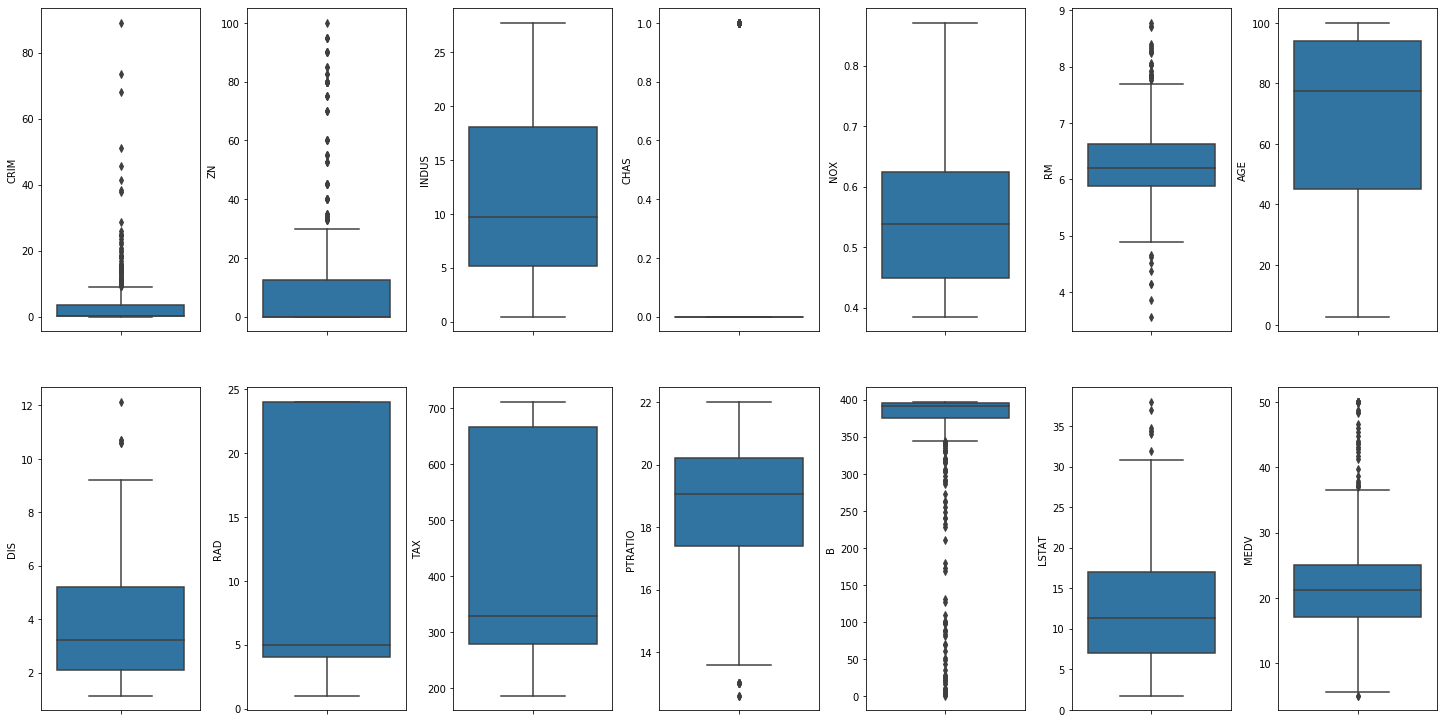

In [7]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in hdata.items():
    sns.boxplot(y=col, data=hdata, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Since the CRIM,ZN and B columns have many outliers we shall just ignore those columns while creating training and testing datasets

## Step 5: Filter Results and Build/Validate Models


Perform any additional data carpentry and begin filtering results/data and then build, validate, and describe your model(s). 

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

In [72]:
print(hdata.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


Now creating the training and testing datasets with 75% of the data to training and 25% to testing 

In [44]:
train = hdata.sample(frac = 0.75, random_state = 1)
test = hdata.drop(train.index)

In [61]:
train_X =np.asarray(train[['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'LSTAT']])
train_y =np.asarray(train['MEDV'])
test_X=np.asarray(test[['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'LSTAT']])
test_y = np.asarray(test['MEDV'])

Fitting the training data sets into LinearRegression model

In [46]:
regr = linear_model.LinearRegression()
regr.fit(train_X,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now calculating R square value for both data 

In [47]:
print('RSquare:{}'.format(regr.score(train_X, train_y)))
print('RSquare:{}'.format(regr.score(test_X, test_y)))

RSquare:0.7105978656464862
RSquare:0.7267032760457122


In [48]:
pred_y=regr.predict(test_X)

In [49]:
print(regr.intercept_)

37.57049683915077


In [50]:
print(regr.coef_)

[-8.45386263e-02  3.06859253e+00 -1.50452274e+01  3.85270121e+00
 -1.50437389e-02 -1.29181064e+00 -1.06657100e-03 -9.27133504e-01
 -5.40570597e-01]


## Step 6: Visualize Results

Build up your key visual story elements!

Add more cells (`Insert > Insert Cell Below`) if you want additional cells.

Now we shall calculate correlation matrix and visualize using heatmap 

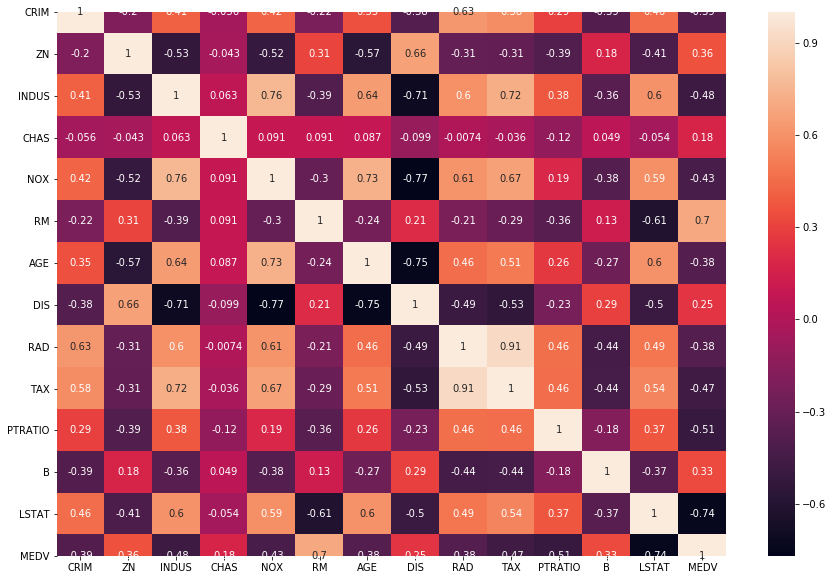

In [20]:
corr=hdata.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)


From the above heatmap we can observe that 'Medv'(Target Variable) value is most negatively correlated to 'LSTAT' and most positively correlated to 'RM'
So lets check this by using scatter plots

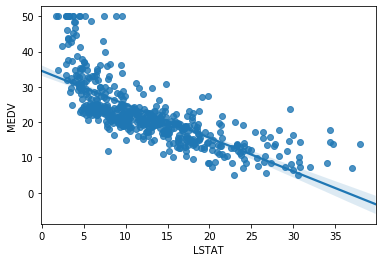

In [22]:
sns.regplot(y=hdata['MEDV'],x=hdata['LSTAT'])

So in the above figure we can see that as the LSTAT value is increasing the MEDV value is decreasing 

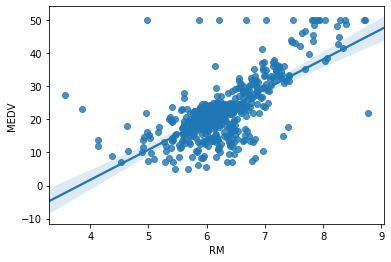

In [23]:
sns.regplot(y=hdata['MEDV'],x=hdata['RM'])

And for RM we can see that as RM increases the MEDV increases since it is positively correlated

## Step 7: Communicate the Story to your intended audience using visualizations and narrative


In a few paragraphs, describe the story the data tells. 

Additionally, post your most compelling visual and provide a brief description of what it conveys on to our mutual aid channel (the slack course channel). 

Feel free to post more examples for people to look at and provide feedback. Your classmates will be vital providers of feedback in this process. Utilize them.

From the above analysis we saw that the variation of house price with the interference of other variables in the correlation matrix . So from the analysis we can say that as the rooms of the house increases the price increrases and in the same way as the as the NOX indicates the nitric oxide percentage as it value increases the house price will be reduced by some extent and INDUS shows the non commercial area around house,So as the house is far from the commercial area then the price of house will be reduced .

So in this way by analysing the data we can get that in what which range these factors are affecting the price of a house in boston.











# Final Step: Connect your workflow/process to the DSA-Project Life Cycle
- List and briefly discuss how important details from each stage of the [DSA-PLC](../../module1/resources/DSA-ProjectLifecycle-slidedeck.pdf) played a role in your story development.
- Use markdown to provide this overview below:
<hr/>

<h1 align="center"><u>DSA-Project Life Cycle Discussion</u></h1>



I have did this Final project story telling step by step as the DSA project lifecycle explains which starts from Project Definition to ML model deployment 

->At first to do project i have searched for some datasets in those i found boston house pricing dataset so from that the purpose of analysing is to predict the price of the house based on it location and several other factors which is the first stage in DSA project lifecycle which is 'Project Definition,Requirements and Expectations'.

->Next 'Data acquisition,Governance,Curation and Source code management', since i did a analysis on a simple and smaller dataset this stage is not much executed.

->The next stage is 'Data shaping and carpentary' which i think is the most important stage in which i removed unwanted columns and cheking for NA values and making the dataset ready for analysis.

->And Next comes 'Exploratory data analysis and visualization' which is also a important stage in which i found that some columns CRIM,Z and B has many outliers so that they affect the training of model so i removed those columns from training

->Next stage is 'Machine Learning Model Planning Building testing' so in this stage we need to decide the model which is suitable for out data i choose Linear Regression and created Training and Testing datasets with 75% to training and 25% to testing.

->After building next come validation like 'Machine learning Model Validation,Visualization and Interpretation' so in this stage i checked R square value to check weather the model is giving expected accuracy or not. This stage decides weather the model selected is appropriate or not.

->And next the analysis is done and need to be presented to the audience who is intended of this analysis so for that we need some visualizations for better understanding to audience and so this stage is named 'Data Story Deployment Reporting'.

->The last stage is 'Machine Learning model Deployment and Monitoring' since my project is a simple prediction project this stage doesn't come into picture that much but this is a important in real time projects where there will be real stakeholders who will be expecting the better performance of the model.



# Save your notebook, then `File > Close and Halt`